# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
import pandas as pd

file_path = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
penguins = pd.read_csv(file_path)
print(penguins.head())

penguins = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)



  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

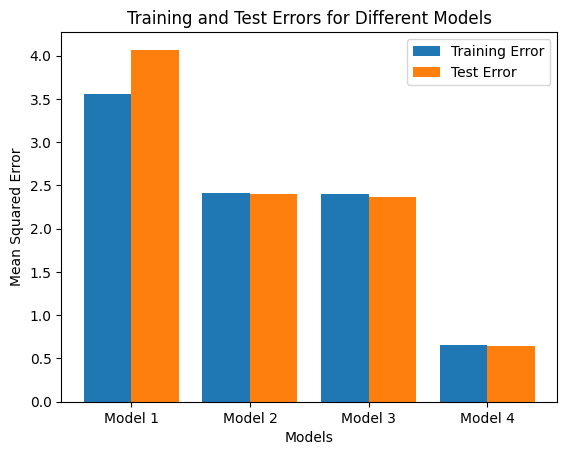

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

file_path = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
penguins = pd.read_csv(file_path)
penguins = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)

X = penguins.drop(columns=['bill_depth_mm'])
y = penguins['bill_depth_mm']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

imputer_y = SimpleImputer(strategy='mean')
y = imputer_y.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = []
models.append(('Model 1', LinearRegression().fit(X_train[:, [0]], y_train)))
models.append(('Model 2', LinearRegression().fit(X_train[:, [0, 1]], y_train)))
models.append(('Model 3', LinearRegression().fit(X_train[:, [0, 1, 2]], y_train)))
models.append(('Model 4', LinearRegression().fit(X_train, y_train)))


training_errors = []
testing_errors = []

for model_name, model in models:
    train_preds = model.predict(X_train[:, :model.coef_.shape[1]])
    test_preds = model.predict(X_test[:, :model.coef_.shape[1]])
    training_errors.append(mean_squared_error(y_train, train_preds))
    testing_errors.append(mean_squared_error(y_test, test_preds))

model_names = [model[0] for model in models]
x = np.arange(len(model_names))

plt.bar(x - 0.2, training_errors, width=0.4, label='Training Error')
plt.bar(x + 0.2, testing_errors, width=0.4, label='Test Error')
plt.xticks(x, model_names)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Test Errors for Different Models')
plt.show()




Model 1 had the highest MSE as well as the biggest difference between training error and test error. Model 4 had the lowest MSE and least difference between the two statistics.